<a href="https://colab.research.google.com/github/davismaulana/PCVK_Genap_2024/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Gamma Correction on Image 
----------------------------------
Masukkan nilai Gamma: 3


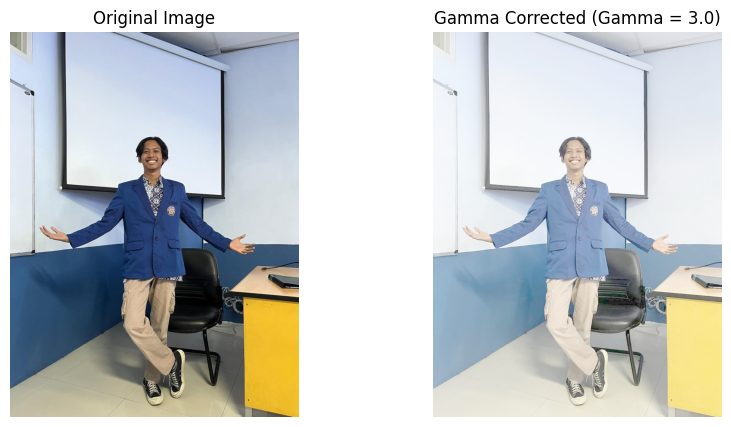

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")

    return cv2.LUT(image, table)


print(' Gamma Correction on Image ')
print('----------------------------------')
try:
    gamma = float(input('Masukkan nilai Gamma: '))
except ValueError:
    print('Error, not a number')

image_path = '/content/drive/MyDrive/images/me.jpeg'
original_image = cv2.imread(image_path)

if original_image is None:
    print("Error: Image not found.")
else:
    gamma_corrected_image = adjust_gamma(original_image, gamma)

    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    gamma_corrected_image_rgb = cv2.cvtColor(gamma_corrected_image, cv2.COLOR_BGR2RGB)

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(original_image_rgb)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(gamma_corrected_image_rgb)
    axs[1].set_title(f'Gamma Corrected (Gamma = {gamma})')
    axs[1].axis('off')

    plt.show()


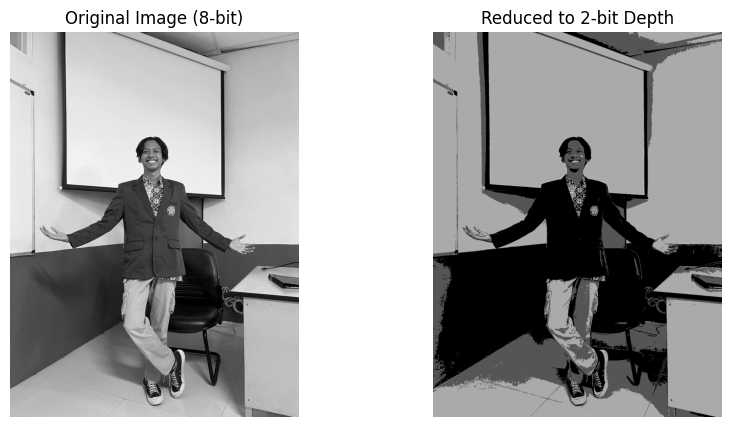

In [6]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

image_path = '/content/drive/MyDrive/images/me.jpeg'
original = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

if original is None:
    print("Error: Image not found.")
else:
    depth_image = np.zeros(original.shape, original.dtype)

    depth_image = (original / level).astype(np.uint8) * level

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(original, cmap='gray')
    axs[0].set_title('Original Image (8-bit)')
    axs[0].axis('off')
    axs[1].imshow(depth_image, cmap='gray')
    axs[1].set_title(f'Reduced to {bit_depth}-bit Depth')
    axs[1].axis('off')

    plt.show()



Average PSNR for different numbers of images:
5 images: Not enough images available
10 images: Not enough images available
20 images: Not enough images available
40 images: Not enough images available
80 images: Not enough images available
100 images: Not enough images available


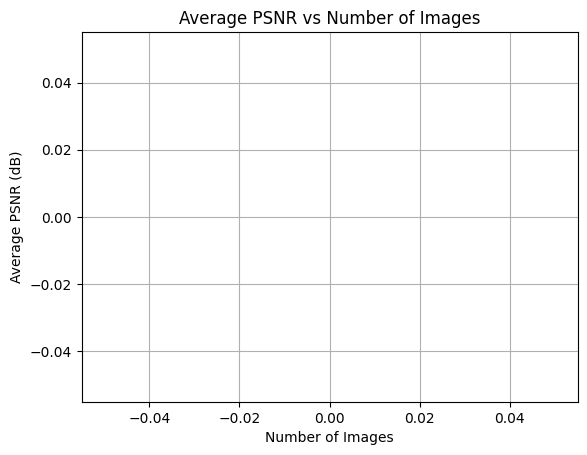

In [7]:
import cv2 as cv
import glob
import numpy as np
import matplotlib.pyplot as plt

# PSNR calculation function
def calculate_psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:  # If the images are identical
        return float('inf')
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Load noisy images and clean images
noisy_images = []
clean_images = []
for img_path in glob.glob('/content/drive/MyDrive/noises*.jpg'):
    noisy_img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)  # Assuming grayscale images for simplicity
    noisy_images.append(noisy_img)

    # Assuming corresponding clean image exists in another folder with the same name
    clean_img_path = img_path.replace('noises', 'clean')  # Replace the 'noises' part of the path with 'clean'
    clean_img = cv.imread(clean_img_path, cv.IMREAD_GRAYSCALE)
    clean_images.append(clean_img)

# PSNR calculations
psnr_values = []
for noisy_img, clean_img in zip(noisy_images, clean_images):
    psnr_value = calculate_psnr(noisy_img, clean_img)
    psnr_values.append(psnr_value)

# Function to calculate average PSNR for a given number of images
def calculate_average_psnr(num_images):
    return np.mean(psnr_values[:num_images])

# Calculate average PSNR for different numbers of images
image_counts = [5, 10, 20, 40, 80, 100]  # Number of images to consider
average_psnr = {}

for count in image_counts:
    if count <= len(psnr_values):
        avg_psnr = calculate_average_psnr(count)
        average_psnr[count] = avg_psnr
    else:
        average_psnr[count] = 'Not enough images available'

# Generate report
print('Average PSNR for different numbers of images:')
for count, avg_psnr in average_psnr.items():
    print(f'{count} images: {avg_psnr}')

# Optionally plot the average PSNR values
counts = [count for count in image_counts if count <= len(psnr_values)]
psnr_avg_values = [average_psnr[count] for count in counts]

plt.plot(counts, psnr_avg_values, marker='o')
plt.title('Average PSNR vs Number of Images')
plt.xlabel('Number of Images')
plt.ylabel('Average PSNR (dB)')
plt.grid(True)
plt.show()
